In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostClassifier


In [586]:
data = pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [587]:
test_data = pd.read_csv('https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv')
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


a classification problem
maybe logistic, LASSO and random forest
confision matrix, Misclassification rate

In [588]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [589]:
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull())))
describe_data(data)

Data Types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
Rows and Columns:
(614, 13)
Column Names:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Null Values:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Statu

In [590]:
dat = data.drop('Loan_ID', axis=1)
objects = []
for c in dat.columns:
    if str(dat[c].dtype) == 'object':
        objects.append(c)

X_ = dat.drop(objects, axis = 1).astype('float64')
dummies = pd.get_dummies(dat[objects], drop_first=True)
X = pd.concat([X_, dummies], axis = 1)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106.0,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072.0,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583.0,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [591]:
test1 = test_data.drop('Loan_ID', axis=1)
objects = []
for c in test1.columns:
    if str(test1[c].dtype) == 'object':
        objects.append(c)

Xt_ = test1.drop(objects, axis = 1).astype('float64')
dummies = pd.get_dummies(test1[objects], drop_first=True)
Xt = pd.concat([Xt_, dummies], axis = 1)
Xt

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720.0,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076.0,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000.0,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340.0,2546.0,100.0,360.0,NaN,1,1,0,1,0,0,0,0,1
4,3276.0,0.0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,1.0,1,1,0,0,1,1,1,0,1
363,4158.0,709.0,115.0,360.0,1.0,1,1,0,0,0,0,0,0,1
364,3250.0,1993.0,126.0,360.0,NaN,1,0,0,0,0,0,0,1,0
365,5000.0,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0,0,0


In [592]:
X = X.fillna(0)

In [593]:
Xt = Xt.fillna(0)

# Feature engineering
add a column

In [594]:
X['total_income'] = X['ApplicantIncome'] + X['CoapplicantIncome']

In [595]:
Xt['total_income'] = Xt['ApplicantIncome'] + Xt['CoapplicantIncome']

In [596]:
np.random.seed(42)
train, test = train_test_split(X, test_size = 0.5)
val, test = train_test_split(test, test_size = 0.5)
X_train = train.drop(['Loan_Status_Y'], axis=1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
y_train = train['Loan_Status_Y'].values

X_val = val.drop(['Loan_Status_Y'], axis=1)
X_val = scaler.transform(X_val)
y_val = val['Loan_Status_Y'].values
X_test = test.drop(['Loan_Status_Y'], axis=1)
X_test = scaler.transform(X_test)
y_test = test['Loan_Status_Y'].values

<Axes: >

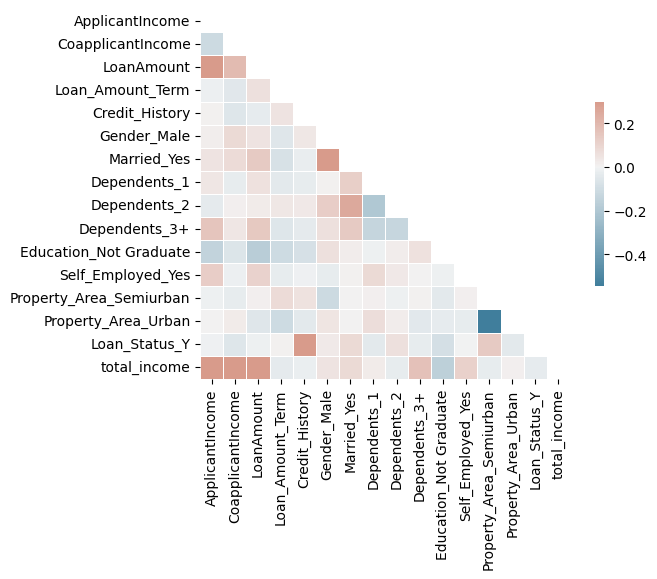

In [597]:
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(X.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Logistic model

fit the model

In [598]:
logistic_model = LogisticRegression(fit_intercept=True, max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [599]:
y_pred_logistic = logistic_model.predict_proba(X_test)
print(logistic_model.intercept_)
print(logistic_model.coef_)

[1.00900762]
[[-0.18300105  0.14182197  0.23745909  0.04056658  0.74236403 -0.22061977
   0.42274121 -0.15757632  0.04450382  0.13880851 -0.08187013  0.07614329
   0.43396445  0.15280627 -0.1173494 ]]


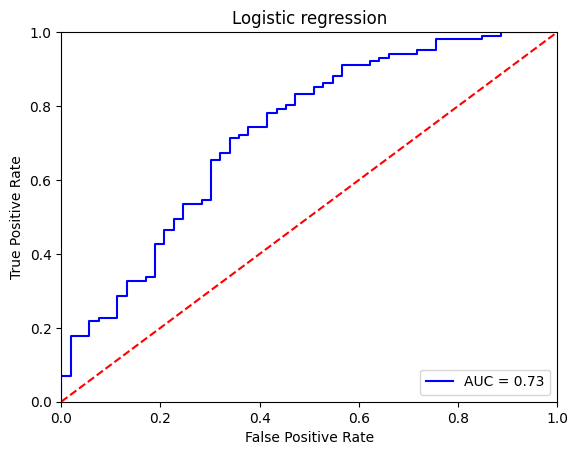

In [600]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_logistic[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Logistic regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [601]:
confusion_matrix(y_test, y_pred_logistic[:,1]>0.5)

array([[17, 36],
       [ 6, 95]])

In [602]:
36/(17+36)

0.6792452830188679

In [603]:
mean_squared_error(y_test, y_pred_logistic[:,1]>0.5)

0.2727272727272727

In [604]:
# accuracy = 1 - MSE
1-mean_squared_error(y_test, y_pred_logistic[:,1]>0.5)

0.7272727272727273

##LASSO

In [605]:
alphas = np.array([00.01, 0.015,0.02, 0.025, 0.03, 0.04])
model_lasso = Lasso(max_iter = 10000)
coefs = []
MSE = []
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train, y_train)
    coefs.append(model_lasso.coef_)
    MSE.append(mean_squared_error(y_val, model_lasso.predict(X_val)))

In [606]:
RMSE = np.sqrt(MSE)
RMSE

array([0.42517113, 0.4221373 , 0.42026843, 0.41918374, 0.41903832,
       0.42080031])

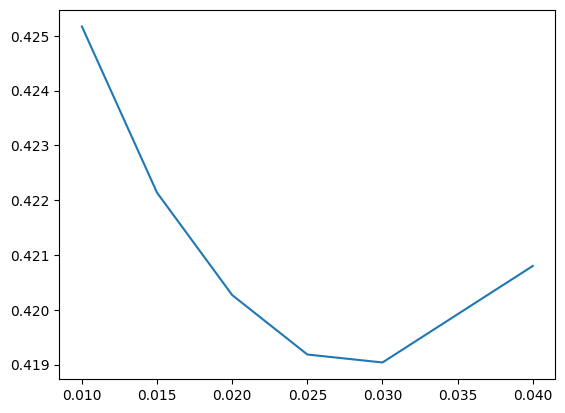

In [607]:
plt.plot(np.flip(alphas), np.flip(RMSE))

In [608]:
model_lasso.set_params(alpha=0.03)
y_lasso = model_lasso.predict(X_test)

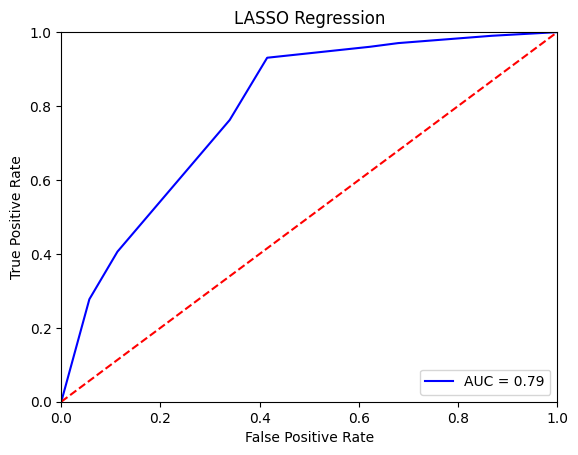

In [609]:
fpr, tpr, threshold = roc_curve(y_test, y_lasso)
roc_auc = auc(fpr, tpr)
plt.title('LASSO Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [610]:
confusion_matrix(y_test, y_lasso>0.5)

array([[20, 33],
       [ 4, 97]])

In [611]:
33/(20+33)

0.6226415094339622

In [612]:
mean_squared_error(y_test,y_lasso>0.5)

0.24025974025974026

#Random forest

In [613]:
np.random.seed(42)
loan_rf = RandomForestClassifier(random_state=1)
loan_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [614]:
loan_rf_high_feat_low_n = RandomForestClassifier(max_features = 6, n_estimators = 500, random_state=1)
loan_rf_high_feat_low_n.fit(X_train, y_train)
loan_rf_high_feat_low_n_pred = loan_rf_high_feat_low_n.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, loan_rf_high_feat_low_n_pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.6858691288639102

In [615]:
loan_rf_high_feat_high_n = RandomForestClassifier(max_features = 6, n_estimators = 2000, random_state=1)
loan_rf_high_feat_high_n.fit(X_train, y_train)
loan_rf_high_feat_high_n_pred = loan_rf_high_feat_high_n.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, loan_rf_high_feat_high_n_pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.6865716579686874

In [616]:
loan_rf_1 = RandomForestClassifier(max_features=6, n_estimators=2000, random_state=1)
loan_rf_1.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=2000, random_state=1)

In [617]:
loan_rf_pred_1 = loan_rf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, loan_rf_pred_1[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.7786288062768539

In [618]:
loan_rf_pred = loan_rf.predict_proba(X_test)

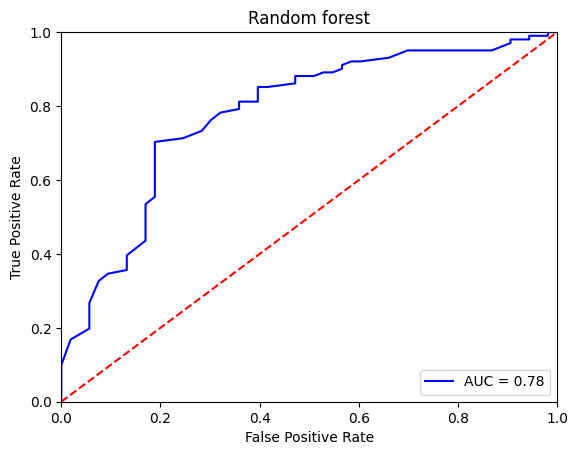

In [619]:
fpr, tpr, threshold = roc_curve(y_test, loan_rf_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Random forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [620]:
confusion_matrix(y_test, loan_rf_pred[:,1]> 0.5)

array([[21, 32],
       [ 8, 93]])

In [621]:
32/(21+32)

0.6037735849056604

In [622]:
mean_squared_error(y_test,loan_rf_pred[:,1] > 0.5)

0.2597402597402597

In [623]:
1-mean_squared_error(y_test,loan_rf_pred[:,1]> 0.5)

0.7402597402597403

#Gradient Boosting Model

In [624]:
np.random.seed(42)
loan_boost_base = GradientBoostingClassifier(random_state=1)
loan_boost_base.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [625]:
loan_boost_slow_many = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.025,random_state=1)
loan_boost_slow_many.fit(X_train, y_train)
loan_boost_slow_many_pred = loan_boost_slow_many.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, loan_boost_slow_many_pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.578883982336411

In [626]:
loan_boost_slow_few = GradientBoostingClassifier(n_estimators=400, learning_rate=0.025,random_state=1)
loan_boost_slow_few.fit(X_train, y_train)
loan_boost_slow_few_pred = loan_boost_slow_few.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, loan_boost_slow_few_pred[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.6198313930148535

In [627]:
loan_boost = GradientBoostingClassifier(n_estimators=400, learning_rate=0.025,random_state=1)
loan_boost.fit(X_train, y_train)
loan_boost_preds = loan_boost.predict_proba(X_test)

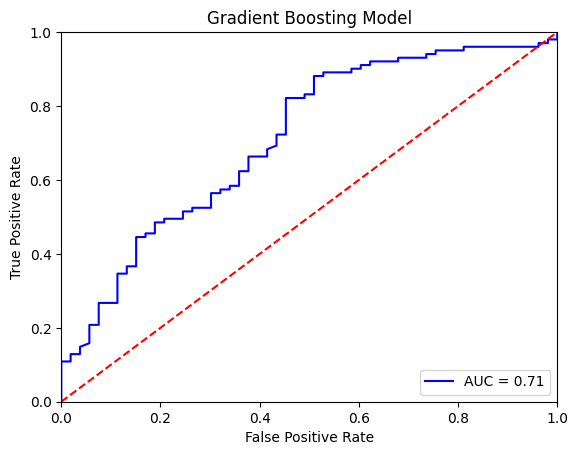

In [628]:
fpr, tpr, threshold = roc_curve(y_test, loan_boost_preds[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Gradient Boosting Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [629]:
confusion_matrix(y_test, loan_boost_preds[:,1]> 0.5)

array([[20, 33],
       [ 8, 93]])

In [648]:
33/(20+33)

0.6226415094339622

In [631]:
mean_squared_error(y_test, loan_boost_preds[:,1]> 0.5)

0.2662337662337662

In [632]:
1-mean_squared_error(y_test, loan_boost_preds[:,1]> 0.5)

0.7337662337662338

#Neural Net

In [633]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [634]:
inputs = keras.Input(shape=(15,))
x = layers.Dense(6, activation="relu", name="dense_1")(inputs)
x = layers.Dense(5, activation="relu", name="dense_2")(x)
x = layers.Dense(4, activation="sigmoid", name="dense_3")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
loan_nnet = keras.Model(inputs=inputs, outputs=outputs)
loan_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [635]:
np.random.seed(42)
history = loan_nnet.fit(
  X_train,
  y_train,
  batch_size=40,
  epochs=800
)

Epoch 1/800
8/8 [==============================] - 1s 4ms/step - loss: 0.6176 - accuracy: 0.7003
Epoch 2/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.7003
Epoch 3/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.7003
Epoch 4/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.7003
Epoch 5/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.7003
Epoch 6/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.7003
Epoch 7/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.7003
Epoch 8/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.7003
Epoch 9/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6106 - accuracy: 0.7003
Epoch 10/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7003
Epoch 11/800
8/8 [===========

In [636]:
loan_nnet_preds = loan_nnet.predict(X_test)

5/5 [==============================] - 0s 3ms/step


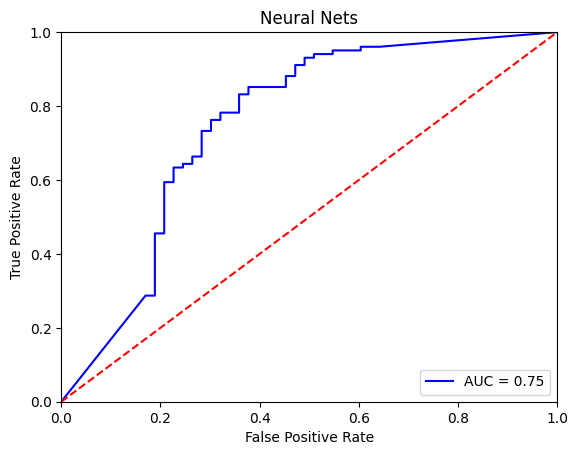

In [652]:
fpr, tpr, threshold = roc_curve(y_test, loan_nnet_preds)
roc_auc = auc(fpr, tpr)
plt.title('Neural Nets')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [638]:
confusion_matrix(y_test, loan_nnet_preds>0.5)

array([[34, 19],
       [19, 82]])

In [650]:
19/(34+19)

0.3584905660377358

In [640]:
mean_squared_error(y_test,loan_nnet_preds>0.5)

0.24675324675324675

In [653]:
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
from tabulate import tabulate  # Import the tabulate module

models = ['Logistic Regression', 'LASSO Regression', 'Random Forest', 'Gradient Boosting', 'Neural nets']  # Add your model names here
y_true_dict = {'Logistic Regression': y_test, 'LASSO Regression': y_test, 'Random Forest': y_test, 'Gradient Boosting': y_test, 'Neural nets': y_test}
y_pred_dict = {'Logistic Regression': y_pred_logistic[:,1]>0.5, 'LASSO Regression': y_lasso>0.5, 'Random Forest': loan_rf_pred[:,1]>0.5, 'Gradient Boosting': loan_boost_preds[:,1]>0.5, 'Neural nets': loan_nnet_preds>0.5}

# Initialize empty lists to store MSE and accuracy
mse_list = []
accuracy_list = []

# Iterate through models
for model_name in models:
    y_true = y_true_dict[model_name]
    y_pred = y_pred_dict[model_name]

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    mse_list.append(mse)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_list.append(accuracy)

FPR = [round(36/(17+36), 3), round(33/(20+33), 3), round(32/(21+32), 3), round(33/(20+33), 3), round(19/(34+19), 3)]
auc_list = [0.73, 0.79, 0.78, 0.71, 0.75]
results_df = pd.DataFrame({'Model': models, 'MSE': mse_list, 'Accuracy': accuracy_list, 'AUC': auc_list, 'False Positive Rate': FPR })

print(tabulate(results_df, headers='keys', tablefmt='pretty'))


+---+---------------------+---------------------+--------------------+------+---------------------+
|   |        Model        |         MSE         |      Accuracy      | AUC  | False Positive Rate |
+---+---------------------+---------------------+--------------------+------+---------------------+
| 0 | Logistic Regression | 0.2727272727272727  | 0.7272727272727273 | 0.73 |        0.679        |
| 1 |  LASSO Regression   | 0.24025974025974026 | 0.7597402597402597 | 0.79 |        0.623        |
| 2 |    Random Forest    | 0.2597402597402597  | 0.7402597402597403 | 0.78 |        0.604        |
| 3 |  Gradient Boosting  | 0.2662337662337662  | 0.7337662337662337 | 0.71 |        0.623        |
| 4 |     Neural nets     | 0.24675324675324675 | 0.7532467532467533 | 0.75 |        0.358        |
+---+---------------------+---------------------+--------------------+------+---------------------+


In [642]:
scaler = StandardScaler().fit(Xt)
Xt = scaler.transform(Xt)
y_submission = model_lasso.predict(Xt)

In [643]:
Loan_ID = test_data['Loan_ID']
submission_df_1 = pd.DataFrame({
                  "Loan_ID": Loan_ID,
                  "Loan_Status": y_submission>0.5})

In [644]:
submission_df_1

,Loan_ID,Loan_Status
0,LP001015,True
1,LP001022,True
2,LP001031,True
3,LP001035,False
4,LP001051,True
...,...,...
362,LP002971,True
363,LP002975,True
364,LP002980,False
365,LP002986,True


In [645]:
submission_df_1['Loan_Status'] = submission_df_1['Loan_Status'].replace([True, False],['Y','N'])

In [646]:
submission_df_1

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,Y


In [654]:
from google.colab import files
submission_df_1.to_csv('loan_predict.csv')
files.download('loan_predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>